# **Weather Prediction**

Challenging weather conditions can have a significant impact on people's lives and businesses. To mitigate the effects, many individuals rely on weather forecasts to plan their daily activities. Although weather forecasts are not always accurate, machine learning and data mining techniques can be used to predict future weather conditions based on historical data.

The purpose of this project is to develop a machine learning-based predictive analysis system that can forecast rainfall for the upcoming day. By analyzing historical data, the system will be able to identify patterns and trends in weather conditions. This information will enable users to make informed plans without uncertainty.

The proposed approach involves building a rainfall prediction classifier using machine learning algorithms. The selection of the best features will be based on their linear relationships with the target variable. The weather data will be used to train baseline machine learning classifiers and a deep sequential model.

By leveraging these models, the system aims to provide accurate predictions of rainfall probabilities. This will assist individuals in making well-informed decisions based on the expected weather conditions.

- **Logistic Regression**
- **K-Nearest Neighbors**
- **Decision Tree**
- **Random Forest**

The models will be trained using the weather data and predict the `RainTomorrow` attribute from the unknown weather data to identify the weather condition. Furthermore, the best-performing model will be improved to find the optimized configuration of the parameters for achieving better classification accuracy on the validation data. Finally, the `RainTomorrow` attribute will be predicted for the unknown weather data using the optimized classifier.

# **1. Importing Packages**
Here, required Python packages have been imported for the analysis.

- The **pandas**, **numpy** packages are required for basic analysis.
- The **matplotlib**, **seaborn** packages are used for visualization purpose.
- The **sklearn**, **tensorflow** packages are used for importing ML and DL models for classification.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score,roc_auc_score


from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **2. Load Datasets**
The Australia Weather Data available on Kaggle consists of weather records from various cities in Australia, including atmospheric parameters. The dataset is divided into two main parts: the weather data and the unknown data. Both datasets provide weather information specific to different locations. However, the weather data includes an additional attribute indicating whether it will rain tomorrow or not.

## **2.1. Read  Original Weather Data**

In [7]:
weather_df = pd.read_csv("datas/Weather Training Data.csv")
print(weather_df.shape)
weather_df.head()

(99516, 23)


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [9]:
print(weather_df.isnull().sum())

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64


## **2.2. Read  Unknown Weather Data**

In [11]:
unknown_weather_df = pd.read_csv("datas/Weather Test Data.csv")
print(unknown_weather_df.shape)
unknown_weather_df.head()

(42677, 22)


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [12]:
unknown_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42483 non-null  float64
 3   MaxTemp        42585 non-null  float64
 4   Rainfall       42250 non-null  float64
 5   Evaporation    24365 non-null  float64
 6   Sunshine       22178 non-null  float64
 7   WindGustDir    39868 non-null  object 
 8   WindGustSpeed  39887 non-null  float64
 9   WindDir9am     39670 non-null  object 
 10  WindDir3pm     41547 non-null  object 
 11  WindSpeed9am   42264 non-null  float64
 12  WindSpeed3pm   41882 non-null  float64
 13  Humidity9am    42136 non-null  float64
 14  Humidity3pm    41573 non-null  float64
 15  Pressure9am    38411 non-null  float64
 16  Pressure3pm    38432 non-null  float64
 17  Cloud9am       26592 non-null  float64
 18  Cloud3

In [13]:
print(unknown_weather_df.isnull().sum())

row ID               0
Location             0
MinTemp            194
MaxTemp             92
Rainfall           427
Evaporation      18312
Sunshine         20499
WindGustDir       2809
WindGustSpeed     2790
WindDir9am        3007
WindDir3pm        1130
WindSpeed9am       413
WindSpeed3pm       795
Humidity9am        541
Humidity3pm       1104
Pressure9am       4266
Pressure3pm       4245
Cloud9am         16085
Cloud3pm         17092
Temp9am            290
Temp3pm            822
RainToday          427
dtype: int64


According to the initial observation, the both of the datasets contain several null values which will affect the experiments as these values have no analytical meaning.

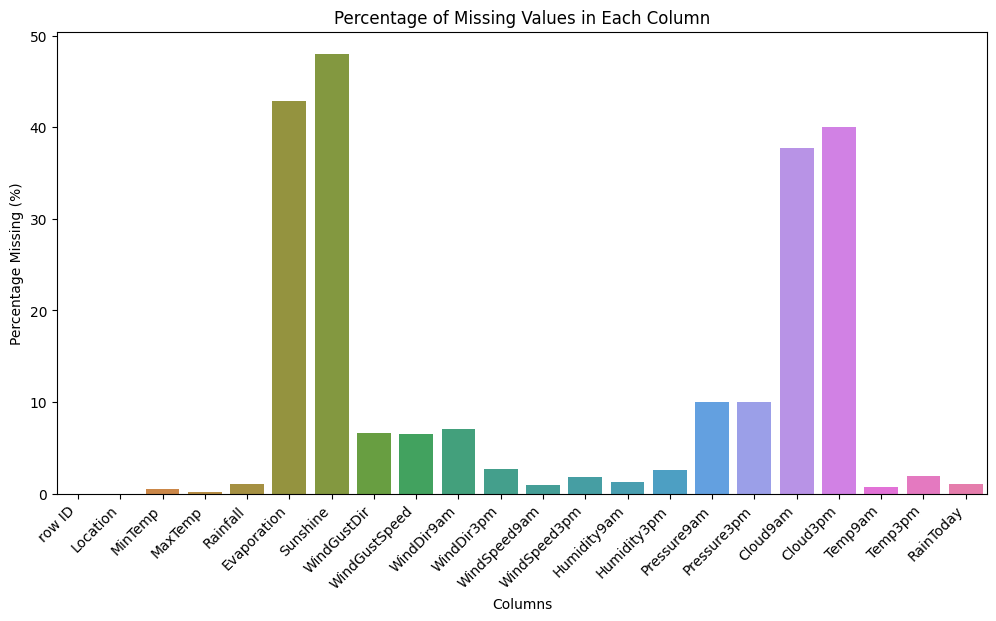

In [14]:
# Calculate the percentage of missing values for each column
missing_percentage = (unknown_weather_df.isnull().sum() / len(unknown_weather_df)) * 100

# Create a color palette with a unique color for each column
colors = sns.color_palette("husl", len(missing_percentage))

# Create a bar plot to visualize the percentage of missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage, palette=colors)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


# **3. Data Pre-processing**
In this section, the step-by-step process for the pre-processing of the data has been performed.

1. The numerical columns containing the null values are as follows -
`MinTemp`, `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am`, `Temp3pm`.

  In order to fill the null values of the numerical columns, the mean of corresponding values has been calculated and the empty fields will be filled using the mean values.

2. The empty character fields are as follows - `WindGustDir`, `WindDir9am`, `WindDir3pm`.

  These fields have been filled with the most frequent values of the respective attributes (except `RainToday`).
  
3. In the Original Weather dataset, the `RainToday` have binary values (Yes and No) so this variable should be converted into **0** (No) and **1** (Yes).

4. In the Original Weather dataset, the records having the empty values for the `RainToday` attribute is always equals to `RainTommorrow` value from above's row (a day before).

  In the Unknown Weather dataset, the records having the empty values for the `RainToday` attribute have been dropped from the dataset since it is quite difficult to decide whether the day was rainy or not.

## **3.1. Pre-processing of Original Weather Data**

In [15]:
updated_weather_df = weather_df
updated_weather_df = updated_weather_df.drop(['row ID'], axis = 1)
updated_weather_df['MinTemp']=updated_weather_df['MinTemp'].fillna(updated_weather_df['MinTemp'].mean())
updated_weather_df['MaxTemp']=updated_weather_df['MaxTemp'].fillna(updated_weather_df['MaxTemp'].mean())
updated_weather_df['Rainfall']=updated_weather_df['Rainfall'].fillna(updated_weather_df['Rainfall'].mean())
updated_weather_df['Evaporation']=updated_weather_df['Evaporation'].fillna(updated_weather_df['Evaporation'].mean())
updated_weather_df['Sunshine']=updated_weather_df['Sunshine'].fillna(updated_weather_df['Sunshine'].mean())
updated_weather_df['WindGustSpeed']=updated_weather_df['WindGustSpeed'].fillna(updated_weather_df['WindGustSpeed'].mean())
updated_weather_df['WindSpeed9am']=updated_weather_df['WindSpeed9am'].fillna(updated_weather_df['WindSpeed9am'].mean())
updated_weather_df['WindSpeed3pm']=updated_weather_df['WindSpeed3pm'].fillna(updated_weather_df['WindSpeed3pm'].mean())
updated_weather_df['Humidity9am']=updated_weather_df['Humidity9am'].fillna(updated_weather_df['Humidity9am'].mean())
updated_weather_df['Humidity3pm']=updated_weather_df['Humidity3pm'].fillna(updated_weather_df['Humidity3pm'].mean())
updated_weather_df['Pressure9am']=updated_weather_df['Pressure9am'].fillna(updated_weather_df['Pressure9am'].mean())
updated_weather_df['Pressure3pm']=updated_weather_df['Pressure3pm'].fillna(updated_weather_df['Pressure3pm'].mean())
updated_weather_df['Cloud9am']=updated_weather_df['Cloud9am'].fillna(updated_weather_df['Cloud9am'].mean())
updated_weather_df['Cloud3pm']=updated_weather_df['Cloud3pm'].fillna(updated_weather_df['Cloud3pm'].mean())
updated_weather_df['Temp9am']=updated_weather_df['Temp9am'].fillna(updated_weather_df['Temp9am'].mean())
updated_weather_df['Temp3pm']=updated_weather_df['Temp3pm'].fillna(updated_weather_df['Temp3pm'].mean())
print(updated_weather_df.isnull().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64


In [16]:
updated_weather_df['WindGustDir'].value_counts()

WindGustDir
W      6843
SE     6475
E      6341
SSE    6329
N      6323
SW     6233
S      6228
WSW    6164
SSW    6023
WNW    5664
NW     5599
ENE    5558
ESE    5101
NE     4956
NNW    4589
NNE    4569
Name: count, dtype: int64

In [17]:
updated_weather_df['WindDir9am'].value_counts()

WindDir9am
N      8052
E      6333
SE     6311
SSE    6214
S      5995
NW     5975
SW     5808
W      5790
NNE    5600
NNW    5457
ENE    5357
NE     5323
ESE    5312
SSW    5147
WNW    5041
WSW    4795
Name: count, dtype: int64

In [18]:
updated_weather_df['WindDir3pm'].value_counts()

WindDir3pm
SE     7410
W      6897
S      6653
WSW    6640
SW     6451
SSE    6386
N      6065
WNW    6063
NW     5917
ESE    5850
E      5839
NE     5710
SSW    5576
NNW    5437
ENE    5413
NNE    4561
Name: count, dtype: int64

In [19]:
updated_weather_df['WindGustDir']=updated_weather_df['WindGustDir'].fillna(updated_weather_df['WindGustDir'].value_counts().idxmax())
updated_weather_df['WindDir9am']=updated_weather_df['WindDir9am'].fillna(updated_weather_df['WindDir9am'].value_counts().idxmax())
updated_weather_df['WindDir3pm']=updated_weather_df['WindDir3pm'].fillna(updated_weather_df['WindDir3pm'].value_counts().idxmax())
print(updated_weather_df.isnull().sum())

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        979
RainTomorrow       0
dtype: int64


In [20]:
updated_weather_df['RainToday'] = updated_weather_df['RainToday'].fillna(updated_weather_df['RainTomorrow'].shift())
print(updated_weather_df.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [21]:
updated_weather_df.loc[updated_weather_df.RainToday == "Yes", "RainToday"] = 1
updated_weather_df.loc[updated_weather_df.RainToday == "No", "RainToday"] = 0
updated_weather_df['RainToday'] = updated_weather_df['RainToday'].astype(int)
updated_weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


## **3.2. Pre-processing of Unknown Weather Data**

In [22]:
updated_unknown_weather_df = unknown_weather_df
updated_unknown_weather_df = updated_unknown_weather_df.drop(['row ID'], axis = 1)
updated_unknown_weather_df['MinTemp']=updated_unknown_weather_df['MinTemp'].fillna(updated_unknown_weather_df['MinTemp'].mean())
updated_unknown_weather_df['MaxTemp']=updated_unknown_weather_df['MaxTemp'].fillna(updated_unknown_weather_df['MaxTemp'].mean())
updated_unknown_weather_df['Rainfall']=updated_unknown_weather_df['Rainfall'].fillna(updated_unknown_weather_df['Rainfall'].mean())
updated_unknown_weather_df['Evaporation']=updated_unknown_weather_df['Evaporation'].fillna(updated_unknown_weather_df['Evaporation'].mean())
updated_unknown_weather_df['Sunshine']=updated_unknown_weather_df['Sunshine'].fillna(updated_unknown_weather_df['Sunshine'].mean())
updated_unknown_weather_df['WindGustSpeed']=updated_unknown_weather_df['WindGustSpeed'].fillna(updated_unknown_weather_df['WindGustSpeed'].mean())
updated_unknown_weather_df['WindSpeed9am']=updated_unknown_weather_df['WindSpeed9am'].fillna(updated_unknown_weather_df['WindSpeed9am'].mean())
updated_unknown_weather_df['WindSpeed3pm']=updated_unknown_weather_df['WindSpeed3pm'].fillna(updated_unknown_weather_df['WindSpeed3pm'].mean())
updated_unknown_weather_df['Humidity9am']=updated_unknown_weather_df['Humidity9am'].fillna(updated_unknown_weather_df['Humidity9am'].mean())
updated_unknown_weather_df['Humidity3pm']=updated_unknown_weather_df['Humidity3pm'].fillna(updated_unknown_weather_df['Humidity3pm'].mean())
updated_unknown_weather_df['Pressure9am']=updated_unknown_weather_df['Pressure9am'].fillna(updated_unknown_weather_df['Pressure9am'].mean())
updated_unknown_weather_df['Pressure3pm']=updated_unknown_weather_df['Pressure3pm'].fillna(updated_unknown_weather_df['Pressure3pm'].mean())
updated_unknown_weather_df['Cloud9am']=updated_unknown_weather_df['Cloud9am'].fillna(updated_unknown_weather_df['Cloud9am'].mean())
updated_unknown_weather_df['Cloud3pm']=updated_unknown_weather_df['Cloud3pm'].fillna(updated_unknown_weather_df['Cloud3pm'].mean())
updated_unknown_weather_df['Temp9am']=updated_unknown_weather_df['Temp9am'].fillna(updated_unknown_weather_df['Temp9am'].mean())
updated_unknown_weather_df['Temp3pm']=updated_unknown_weather_df['Temp3pm'].fillna(updated_unknown_weather_df['Temp3pm'].mean())
print(updated_unknown_weather_df.isnull().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      2809
WindGustSpeed       0
WindDir9am       3007
WindDir3pm       1130
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         427
dtype: int64


In [23]:
updated_unknown_weather_df['WindGustDir']=updated_unknown_weather_df['WindGustDir'].fillna(updated_unknown_weather_df['WindGustDir'].value_counts().idxmax())
updated_unknown_weather_df['WindDir9am']=updated_unknown_weather_df['WindDir9am'].fillna(updated_unknown_weather_df['WindDir9am'].value_counts().idxmax())
updated_unknown_weather_df['WindDir3pm']=updated_unknown_weather_df['WindDir3pm'].fillna(updated_unknown_weather_df['WindDir3pm'].value_counts().idxmax())
print(updated_unknown_weather_df.isnull().sum())

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        427
dtype: int64


In [24]:
updated_unknown_weather_df=updated_unknown_weather_df.dropna()
print(updated_unknown_weather_df.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64


In [26]:
updated_unknown_weather_df.loc[updated_unknown_weather_df.RainToday == "Yes", "RainToday"] = 1
updated_unknown_weather_df.loc[updated_unknown_weather_df.RainToday == "No", "RainToday"] = 0
updated_unknown_weather_df['RainToday'] = updated_unknown_weather_df['RainToday'].astype(int)
updated_unknown_weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,12.9,25.7,0.0,5.489715,7.647831,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,0
1,Albury,9.2,28.0,0.0,5.489715,7.647831,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,0
2,Albury,14.3,25.0,0.0,5.489715,7.647831,W,50.0,SW,W,...,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,0
3,Albury,9.7,31.9,0.0,5.489715,7.647831,NNW,80.0,SE,NW,...,28.0,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,0
4,Albury,15.9,18.6,15.6,5.489715,7.647831,W,61.0,NNW,NNW,...,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1


# **4. Data Analysis**

## **4.1. Feature Distribution**

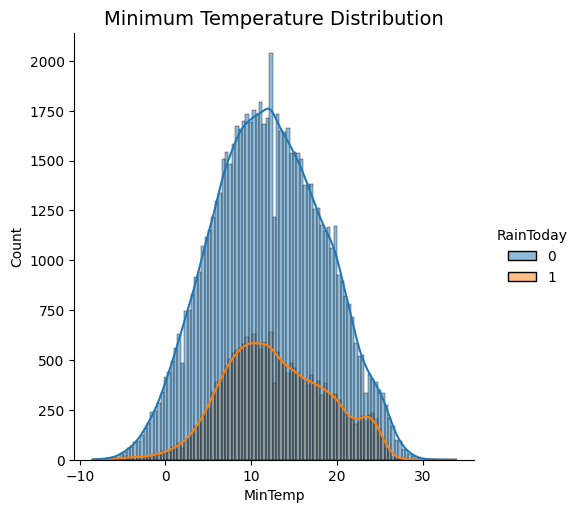

In [27]:
sns.displot(updated_weather_df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

During the analysis it has been found that the range of minimum temperature is from -8.5$^\circ$C to 33.9$^\circ$C and 11$^\circ$C minimum temperature has the highest frequency in the dataset.

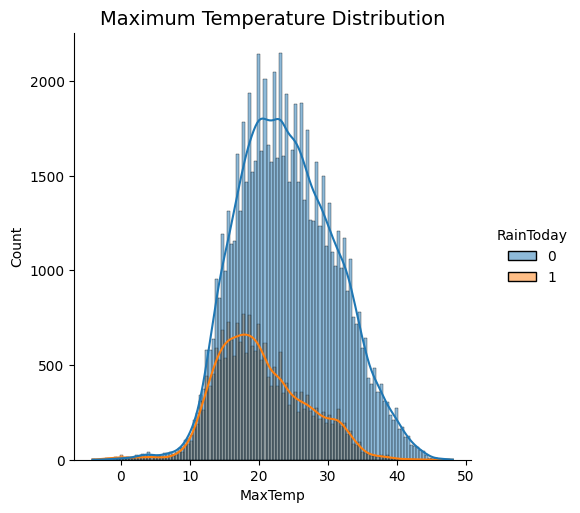

In [28]:
sns.displot(updated_weather_df, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

On the other hand, the range of maximum temperature is from -4.1$^\circ$C to 48.1$^\circ$C and 20$^\circ$C maximum temperature has the highest frequency in the dataset.

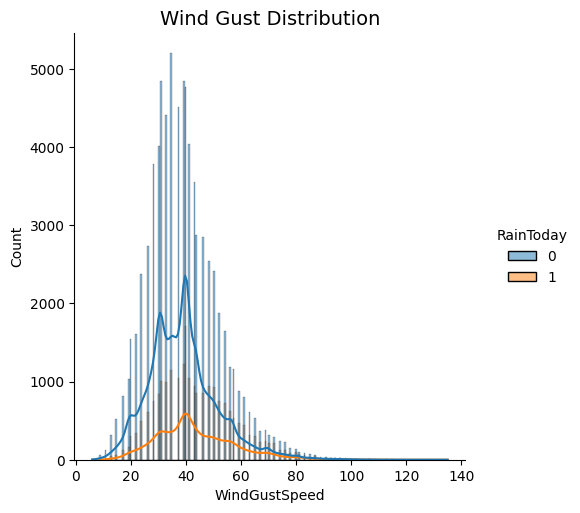

In [29]:
sns.displot(updated_weather_df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of strong wind gusts is from 6 compass points to 135 compass points and 39.98 compass points of wind gusts have the highest frequency in the dataset.

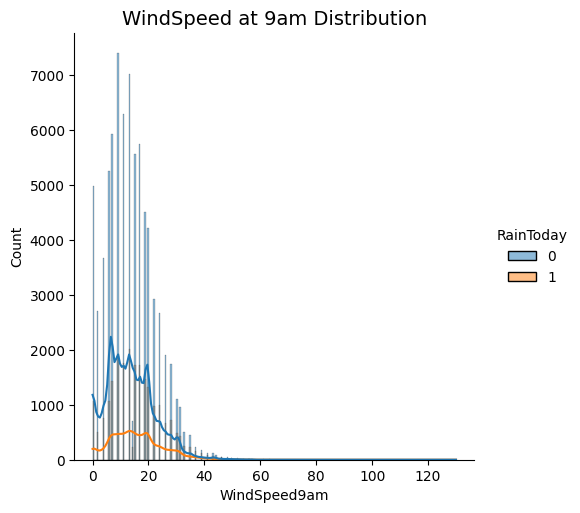

In [30]:
sns.displot(updated_weather_df, x="WindSpeed9am", hue='RainToday', kde=True)
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of wind speed at 9 am is from 0 kmph to 130 kmph and 9 kmph of wind speed has the highest frequency in the dataset.

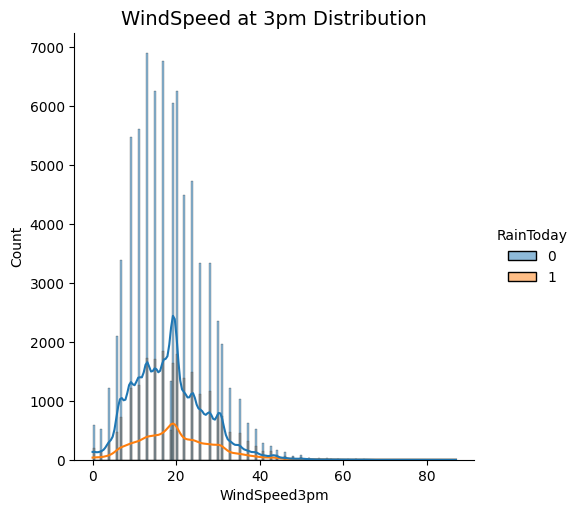

In [31]:
sns.displot(updated_weather_df, x="WindSpeed3pm", hue='RainToday', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, the range of wind speed at 3 pm is from 0 kmph to 87 kmph and 17 kmph of wind speed has the highest frequency in the dataset.

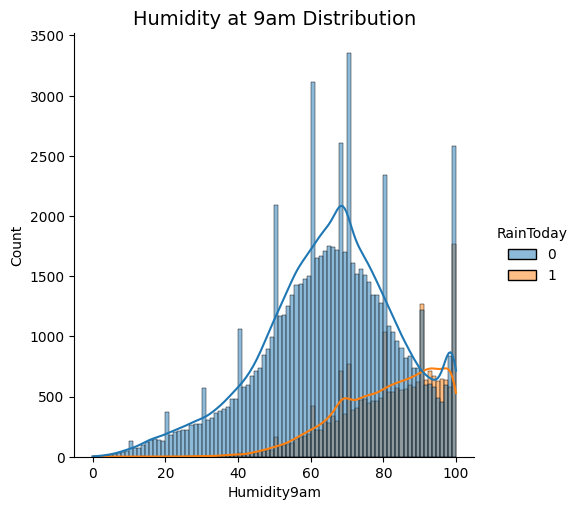

In [32]:
sns.displot(updated_weather_df, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of humidity at 9 am and 3 pm is from 0% to 100% and 99% of humidity at 9 am has the highest frequency in the dataset.

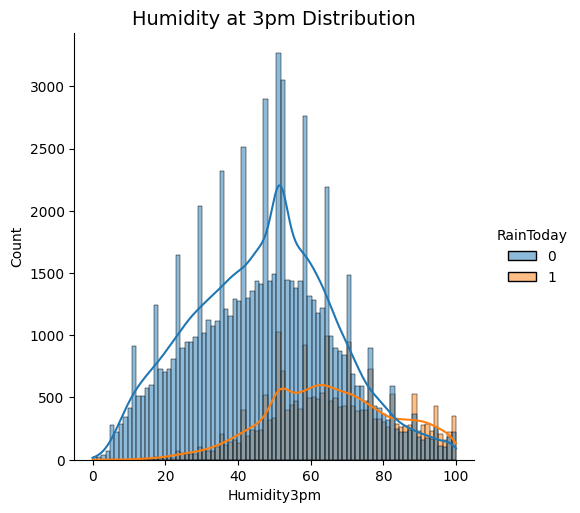

In [33]:
sns.displot(updated_weather_df, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, 54.43% of humidity at 3 pm has the highest frequency in the dataset.

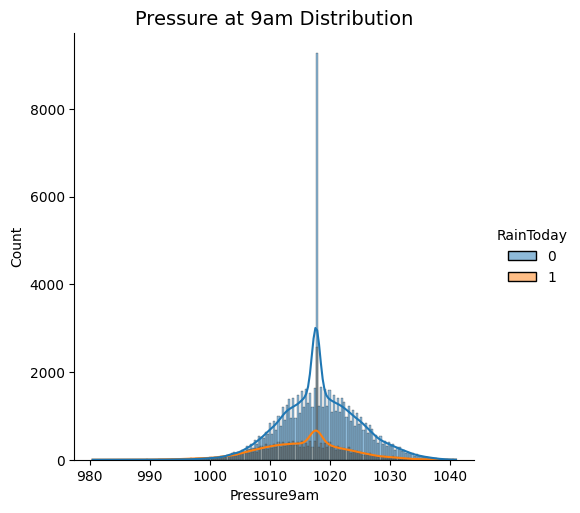

In [34]:
sns.displot(updated_weather_df, x="Pressure9am", hue='RainToday', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of wind pressure at 9 am is from 980.5 hPa to 1042 hPa and 1017.68 hPa of pressure has the highest frequency in the dataset.

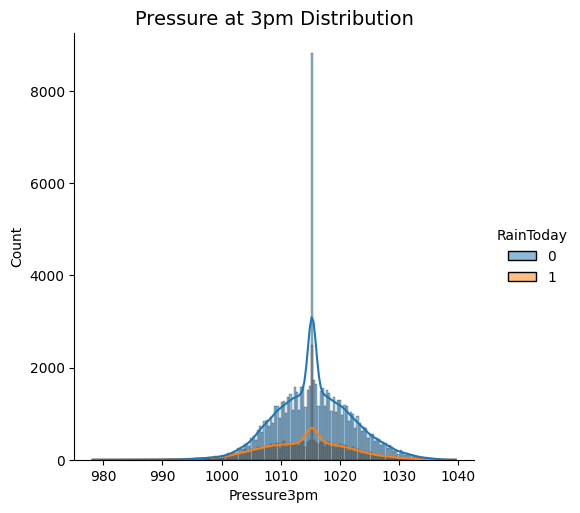

In [35]:
sns.displot(updated_weather_df, x="Pressure3pm", hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, the range of pressure at 3 pm is from 978.2 hPa to 1039.6 hPa and 1015.28 hPa of pressure has the highest frequency in the dataset.

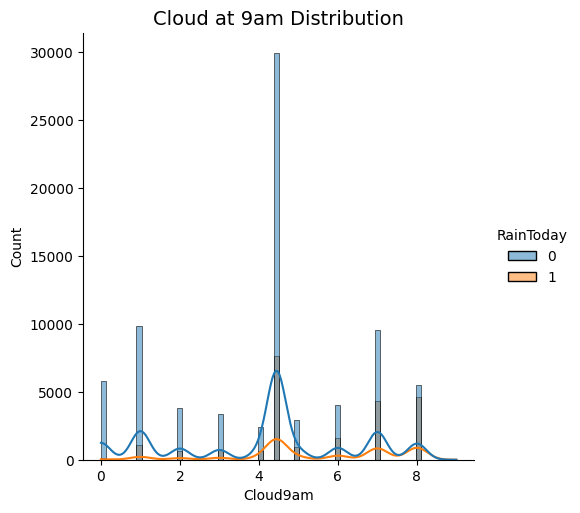

In [36]:
sns.displot(updated_weather_df, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of cloud at 9 am and 3 pm is from 0 eighths to 9 eighths and 4.44 eighths of cloud at 9 am has the highest frequency in the dataset.

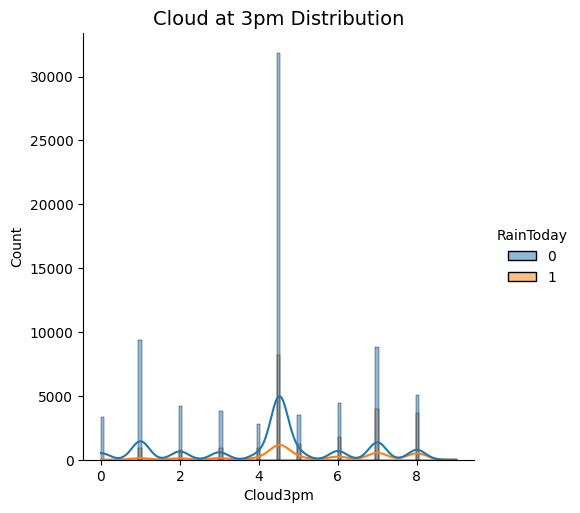

In [37]:
sns.displot(updated_weather_df, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, 4.52 eighths of cloud at 3 pm has the highest frequency in the dataset.

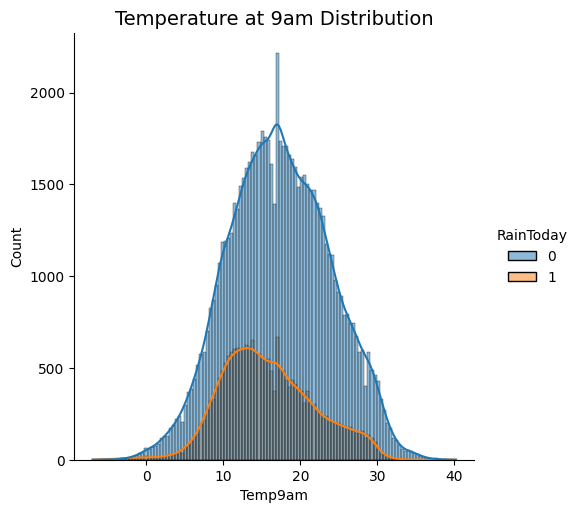

In [38]:
sns.displot(updated_weather_df, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of wind temperature at 9 am is from -7 C to 40.2 C and 1 C of temperature has the highest frequency in the dataset.

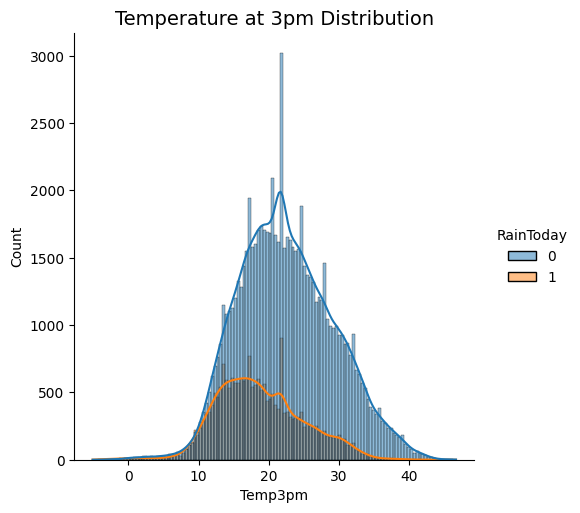

In [39]:
sns.displot(updated_weather_df, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, the range of pressure at 3 pm is from -5.1 C to 46.7 C and 27.68 C of temperature has the highest frequency in the dataset.

## **4.2. EDA**

### **4.2.1. Average WindSpeed Analysis**

In [40]:
windspeed_weather_df = updated_weather_df.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df.head()

,Location,WindSpeed9am,WindSpeed3pm
0,Adelaide,10.005519,15.525070
1,Albany,12.564695,18.847500
2,Albury,8.208690,14.411579
3,AliceSprings,14.658804,18.019184
4,BadgerysCreek,8.132324,14.019945


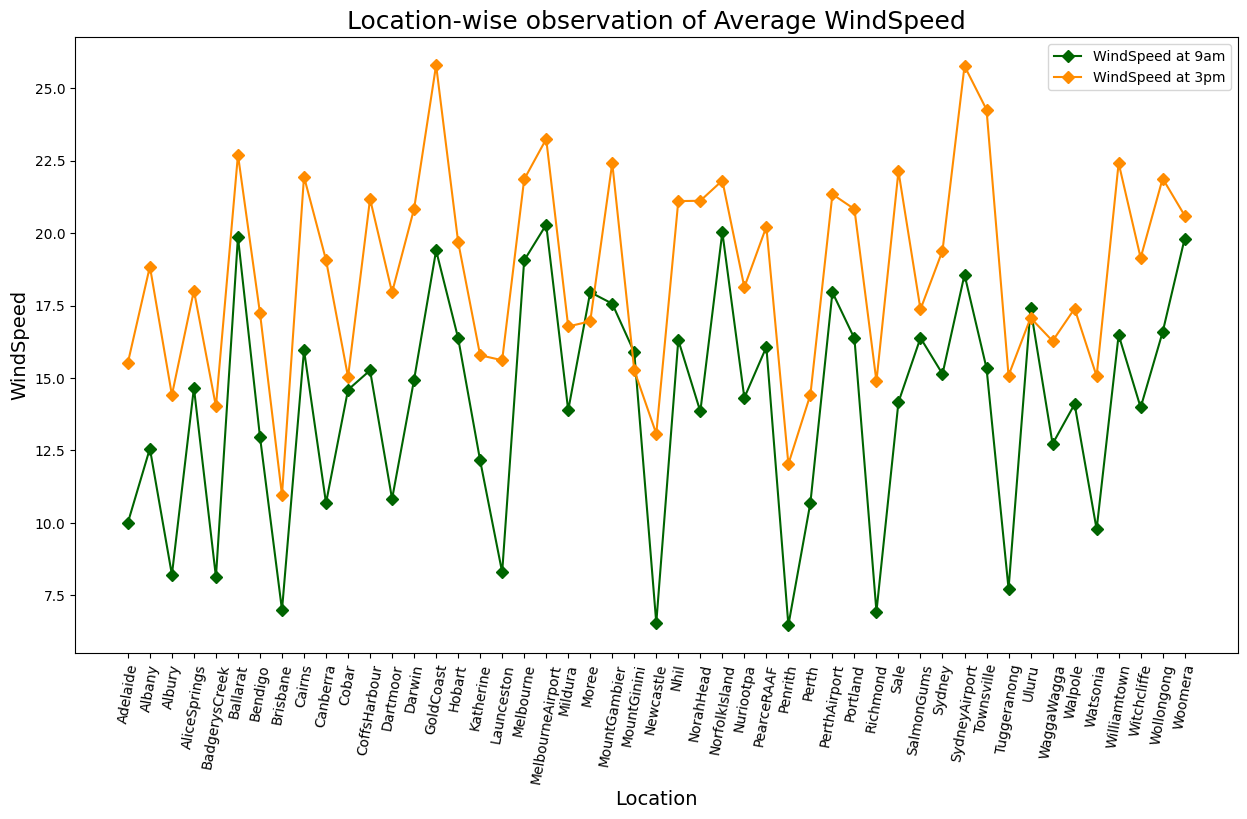

In [41]:
x = windspeed_weather_df.loc[:, 'Location']
y1 = windspeed_weather_df['WindSpeed9am'] 
y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Location-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

According to our data, the Melbourne Airport's wind speed at 9 a.m. has the greatest wind speed at 20.29 kmph. On the other hand, the Gold Coast of Australia experiences the strongest wind at 3 pm, reaching a speed of 25.77 kmph. Ultimately, it can be said that there is a significant difference in wind speed between 9 am and 3 pm.

### **4.2.2. Average Humidity Analysis**

In [42]:
humidity_weather_df = updated_weather_df.groupby(['Location'])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df.head()

,Location,Humidity9am,Humidity3pm
0,Adelaide,60.082001,45.008601
1,Albany,74.742430,63.826466
2,Albury,74.309461,48.107983
3,AliceSprings,39.875224,24.305207
4,BadgerysCreek,76.677018,51.166781


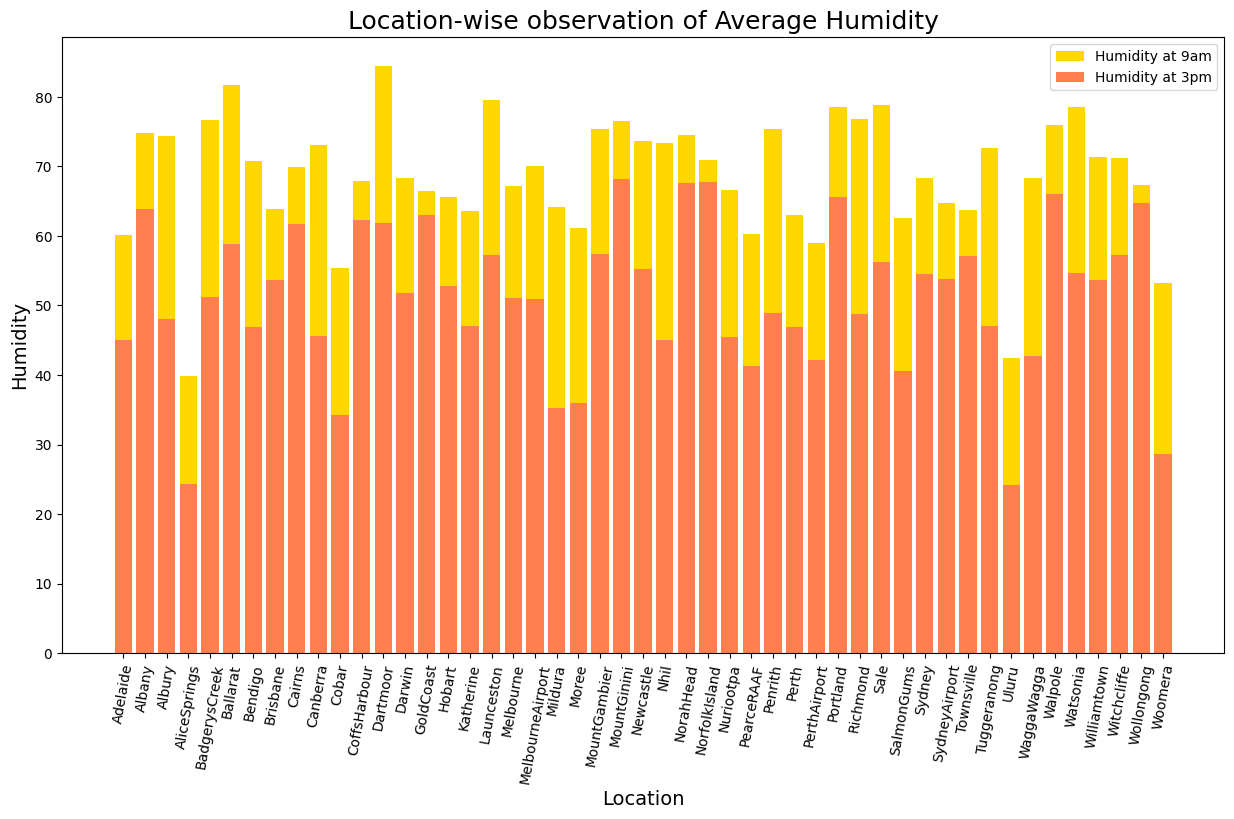

In [43]:
x = humidity_weather_df.loc[:, 'Location']
y1 = humidity_weather_df['Humidity9am'] 
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize = (15, 8))

plt.bar(x, y1, color = 'gold', label = 'Humidity at 9am') 
plt.bar(x, y2, color = 'coral',label = 'Humidity at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Location-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

According to our data, the Melbourne Airport's wind speed at 9 a.m. has the greatest wind speed at 20.29 kmph. On the other hand, the Gold Coast of Australia experiences the strongest wind at 3 pm, reaching a speed of 25.77 kmph. Ultimately, it can be said that there is a significant difference in wind speed between 9 am and 3 pm.

### **4.2.3. Average Pressure Analysis**

In [44]:
pressure_weather_df = updated_weather_df.groupby(['Location'])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df.head()

,Location,Pressure9am,Pressure3pm
0,Adelaide,1018.709193,1016.774348
1,Albany,1018.366913,1016.573801
2,Albury,1018.382073,1015.759551
3,AliceSprings,1016.610611,1012.806830
4,BadgerysCreek,1018.533488,1015.740251


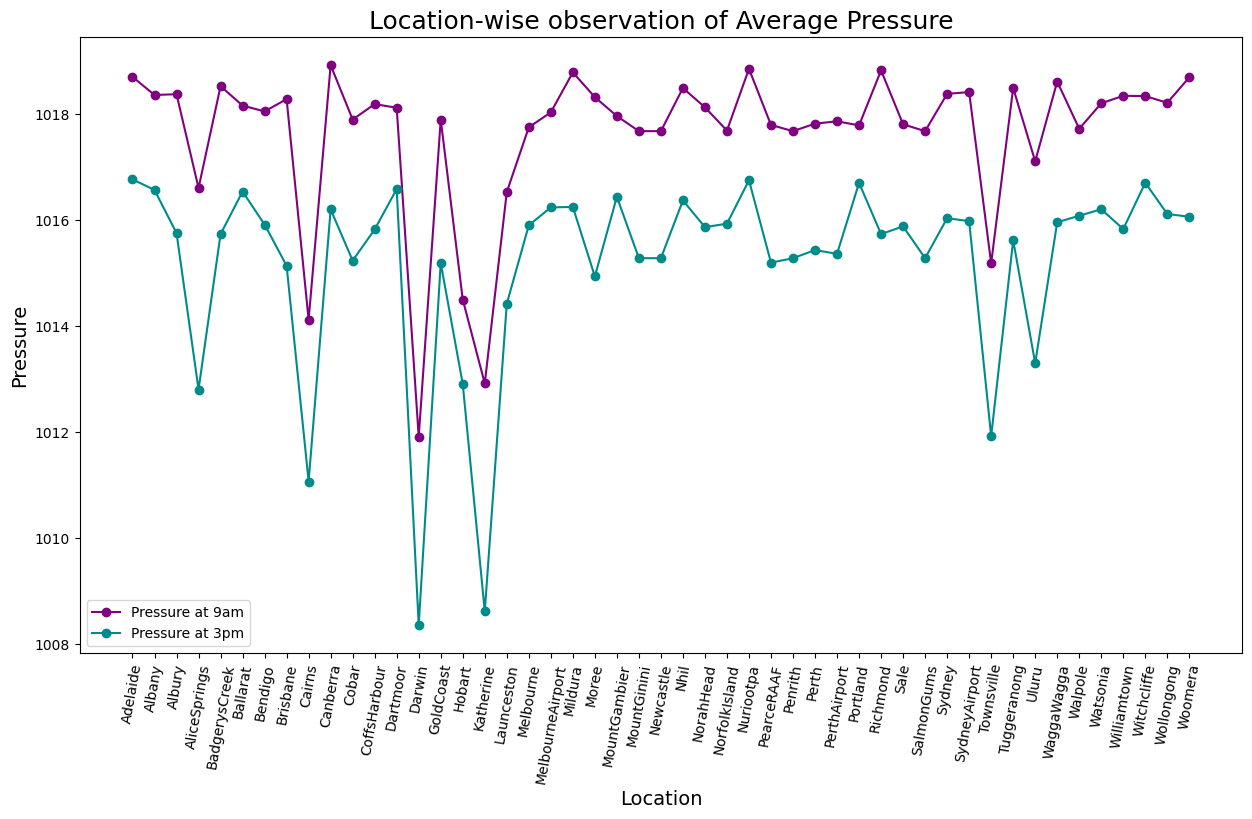

In [45]:
x = pressure_weather_df.loc[:, 'Location']
y1 = pressure_weather_df['Pressure9am'] 
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'purple', label = 'Pressure at 9am') 
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'Pressure at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Pressure', fontsize = 14)
plt.title('Location-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

Based on our investigation, the greatest pressure was recorded in Canberra at 9 am, with a reading of 1018.93 hPa. Conversely, Adelaide, Australia, experiences the maximum pressure of 1016.79 hPa at 3 p.m. Ultimately, it may be said that the pressure is substantially higher at 9 am than the wind speed is at 3 pm.

### **4.2.4. Average Temperature Analysis**

In [46]:
location_weather_df = updated_weather_df.groupby(['Location'])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df.head()

,Location,MinTemp,MaxTemp,Temp9am,Temp3pm
0,Adelaide,12.525150,22.781468,16.831685,21.449745
1,Albany,12.887445,20.036660,16.205778,19.097254
2,Albury,9.502057,22.529607,14.276363,21.260711
3,AliceSprings,13.219149,29.295517,21.379000,28.055253
4,BadgerysCreek,11.137181,23.961459,16.546600,22.458805


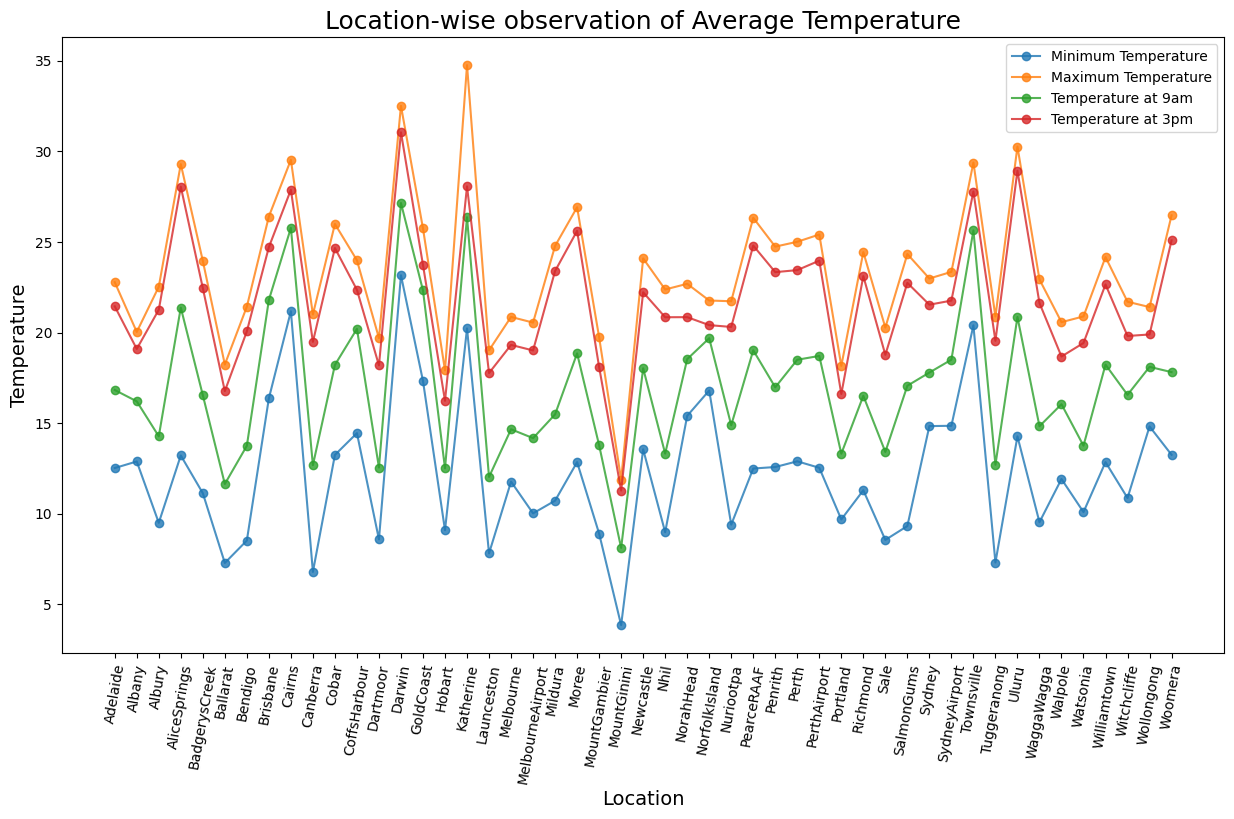

In [47]:
x = location_weather_df.loc[:, 'Location']
y1 = location_weather_df['MinTemp'] 
y2 = location_weather_df['MaxTemp']
y3 = location_weather_df['Temp9am'] 
y4 = location_weather_df['Temp3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, label = 'Minimum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y2, label = 'Maximum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y3, label = 'Temperature at 9am', marker='o', alpha = 0.8) 
plt.plot(x, y4, label = 'Temperature at 3pm', marker='o', alpha = 0.8)

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Location-wise observation of Average Temperature', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

# **5. Predictive Analysis**

## **5.1. Feature Extraction**
First, the numerical and character properties have been identified in order to extract features from the dataset. The character variables must be translated into numerical variables because they cannot be utilized as the input for machine learning classifiers. The identified character variables are – `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`. These variables need to be labelled as encoded using one-hot encoding so that the final feature set has only contained the numerical data. During one-hot encoding new columns are created to equal the unique value of an attribute.

### **5.1.1. Original Weather Features**

In [48]:
num_weather_df = updated_weather_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]
num_weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


In [49]:
column_names = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
one_original_hot = pd.get_dummies(updated_weather_df[column_names])
one_original_hot.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [50]:
final_df = pd.concat([num_weather_df, one_original_hot], axis=1)
final_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,...,False,False,False,False,False,False,False,True,False,False
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,...,False,False,False,False,False,False,False,True,False,False


### **5.1.2. Unknown Weather Features**

In [51]:
num_unknown_weather_df = updated_unknown_weather_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                                                     'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
                                                     'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                                     'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                                     'Temp9am', 'Temp3pm', 'RainToday']]
num_unknown_weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,12.9,25.7,0.0,5.489715,7.647831,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,0
1,9.2,28.0,0.0,5.489715,7.647831,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,0
2,14.3,25.0,0.0,5.489715,7.647831,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,0
3,9.7,31.9,0.0,5.489715,7.647831,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,0
4,15.9,18.6,15.6,5.489715,7.647831,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1


In [52]:
column_names = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
one_unknown_hot = pd.get_dummies(updated_unknown_weather_df[column_names])
one_unknown_hot.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [53]:
final_unknown_df = pd.concat([num_unknown_weather_df, one_unknown_hot], axis=1)
final_unknown_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,12.9,25.7,0.0,5.489715,7.647831,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
1,9.2,28.0,0.0,5.489715,7.647831,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
2,14.3,25.0,0.0,5.489715,7.647831,50.0,20.0,24.0,49.0,19.0,...,False,False,False,False,False,False,False,True,False,False
3,9.7,31.9,0.0,5.489715,7.647831,80.0,7.0,28.0,42.0,9.0,...,False,True,False,False,False,False,False,False,False,False
4,15.9,18.6,15.6,5.489715,7.647831,61.0,28.0,28.0,76.0,93.0,...,True,False,False,False,False,False,False,False,False,False


## **5.2. Feature Selection**

### **5.2.1. Correlation of Original Weather Features**

In [54]:
weather_corr = final_df.corr()
weather_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
MinTemp,1.000000,0.734449,0.103347,0.358375,0.053518,0.174879,0.177037,0.172645,-0.235020,0.004329,...,-0.070841,-0.063972,-0.011599,0.056401,0.023793,-0.035708,-0.046090,-0.078744,-0.046073,-0.059135
MaxTemp,0.734449,1.000000,-0.073583,0.447584,0.331618,0.069864,0.017958,0.050423,-0.501493,-0.500325,...,-0.009106,-0.007303,-0.057861,0.006588,-0.012940,-0.062098,-0.055131,-0.070555,-0.026208,-0.059769
Rainfall,0.103347,-0.073583,1.000000,-0.039140,-0.171406,0.127677,0.087206,0.060072,0.219696,0.248604,...,-0.019310,-0.005525,0.019872,0.010470,0.013388,0.025189,0.011413,0.016227,0.009919,0.012508
Evaporation,0.358375,0.447584,-0.039140,1.000000,0.292557,0.150608,0.143145,0.093413,-0.380420,-0.291679,...,-0.029717,-0.018793,-0.010011,0.013631,0.017389,-0.007608,0.001833,-0.025697,-0.024420,-0.009999
Sunshine,0.053518,0.331618,-0.171406,0.292557,1.000000,-0.019216,0.008317,0.039623,-0.350935,-0.446119,...,-0.019054,-0.009157,-0.029154,0.000825,-0.012564,-0.017939,0.020497,-0.014561,-0.010444,0.008384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WindDir3pm_SSW,-0.035708,-0.062098,0.025189,-0.007608,-0.017939,-0.006217,0.010992,-0.009039,0.027116,0.027926,...,-0.058569,-0.061256,-0.065211,-0.081693,-0.063798,1.000000,-0.064144,-0.066484,-0.062056,-0.065143
WindDir3pm_SW,-0.046090,-0.055131,0.011413,0.001833,0.020497,0.007115,-0.003023,0.006444,-0.004957,-0.007709,...,-0.063293,-0.066197,-0.070471,-0.088281,-0.068943,-0.064144,1.000000,-0.071846,-0.067061,-0.070397
WindDir3pm_W,-0.078744,-0.070555,0.016227,-0.025697,-0.014561,0.087990,0.027363,0.059178,0.002357,-0.018787,...,-0.065601,-0.068611,-0.073041,-0.091501,-0.071458,-0.066484,-0.071846,1.000000,-0.069507,-0.072965
WindDir3pm_WNW,-0.046073,-0.026208,0.009919,-0.024420,-0.010444,0.084901,0.014906,0.056502,-0.002095,-0.034151,...,-0.061232,-0.064042,-0.068176,-0.085407,-0.066699,-0.062056,-0.067061,-0.069507,1.000000,-0.068105


### **5.2.2. Features Selection from Weather Data**

In [55]:
cor_target = abs(weather_corr["RainTomorrow"])

relevant_train_features = cor_target[cor_target>0.20]
relevant_train_features

Rainfall         0.236476
Sunshine         0.326659
WindGustSpeed    0.225439
Humidity9am      0.254008
Humidity3pm      0.438649
Pressure9am      0.235220
Pressure3pm      0.215813
Cloud9am         0.252877
Cloud3pm         0.297873
RainToday        0.309025
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [56]:
final_weather_train_data = final_df[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                     'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                     'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'RainToday', 'RainTomorrow']]
final_weather_train_data.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,7.61509,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,0,0
1,0.0,7.61509,44.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,0,0
2,1.0,7.61509,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0
3,0.2,7.61509,56.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,0,0
4,0.0,7.61509,35.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,0,0


### **5.2.3. Correlation of Selected Weather Features**

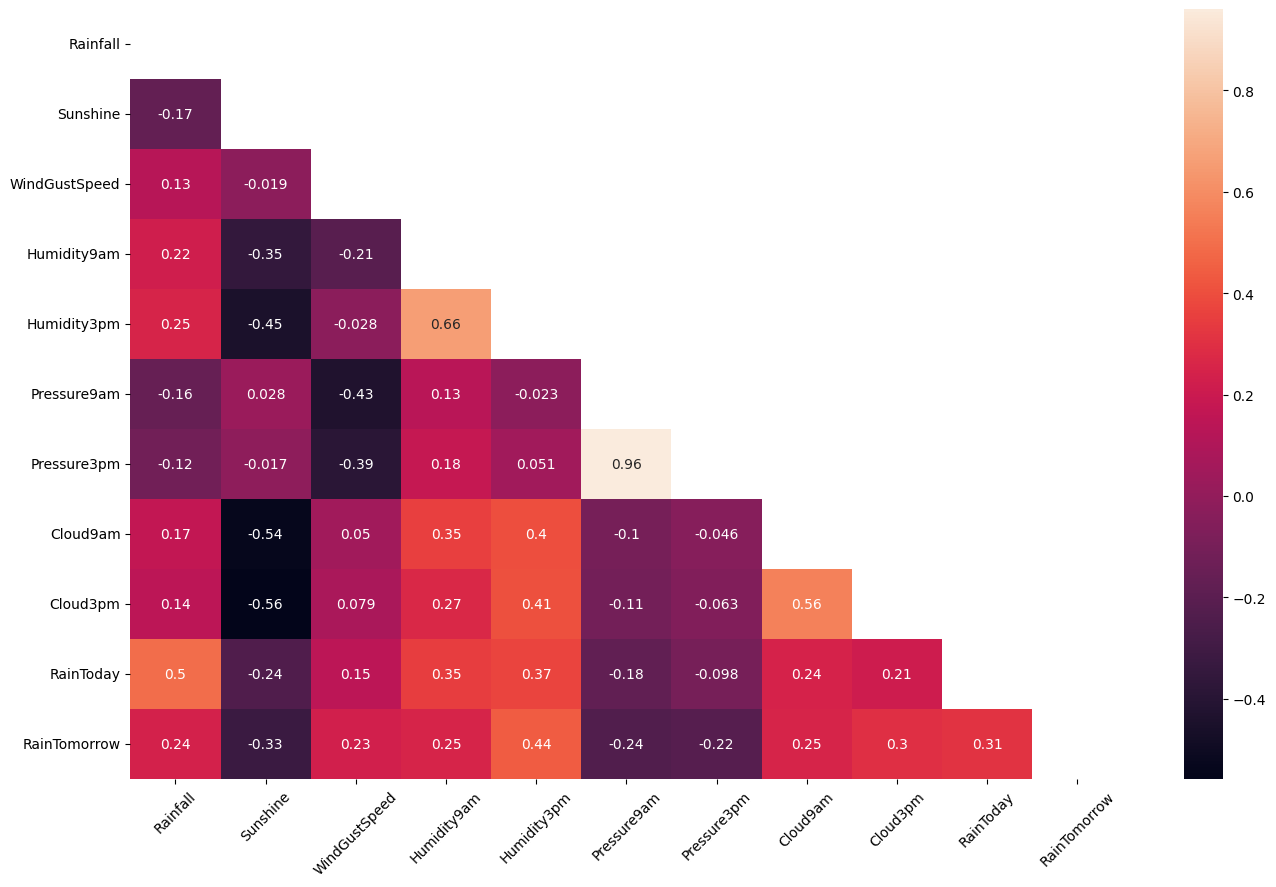

In [57]:
final_train_corr = final_weather_train_data.corr()
mask = np.triu(np.ones_like(final_train_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_train_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

### **5.2.4. Features Selection from Unknown Weather Data**

In [58]:
final_weather_test_data = final_unknown_df[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                            'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                            'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                            'RainToday']]
final_weather_test_data.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,0.0,7.647831,46.0,38.0,30.0,1007.6,1008.7,4.412041,2.000000,0
1,0.0,7.647831,24.0,45.0,16.0,1017.6,1012.8,4.412041,4.466054,0
2,0.0,7.647831,50.0,49.0,19.0,1009.6,1008.2,1.000000,4.466054,0
3,0.0,7.647831,80.0,42.0,9.0,1008.9,1003.6,4.412041,4.466054,0
4,15.6,7.647831,61.0,76.0,93.0,994.3,993.0,8.000000,8.000000,1


### **5.2.5. Correlation of Selected Unknown Weather Features**

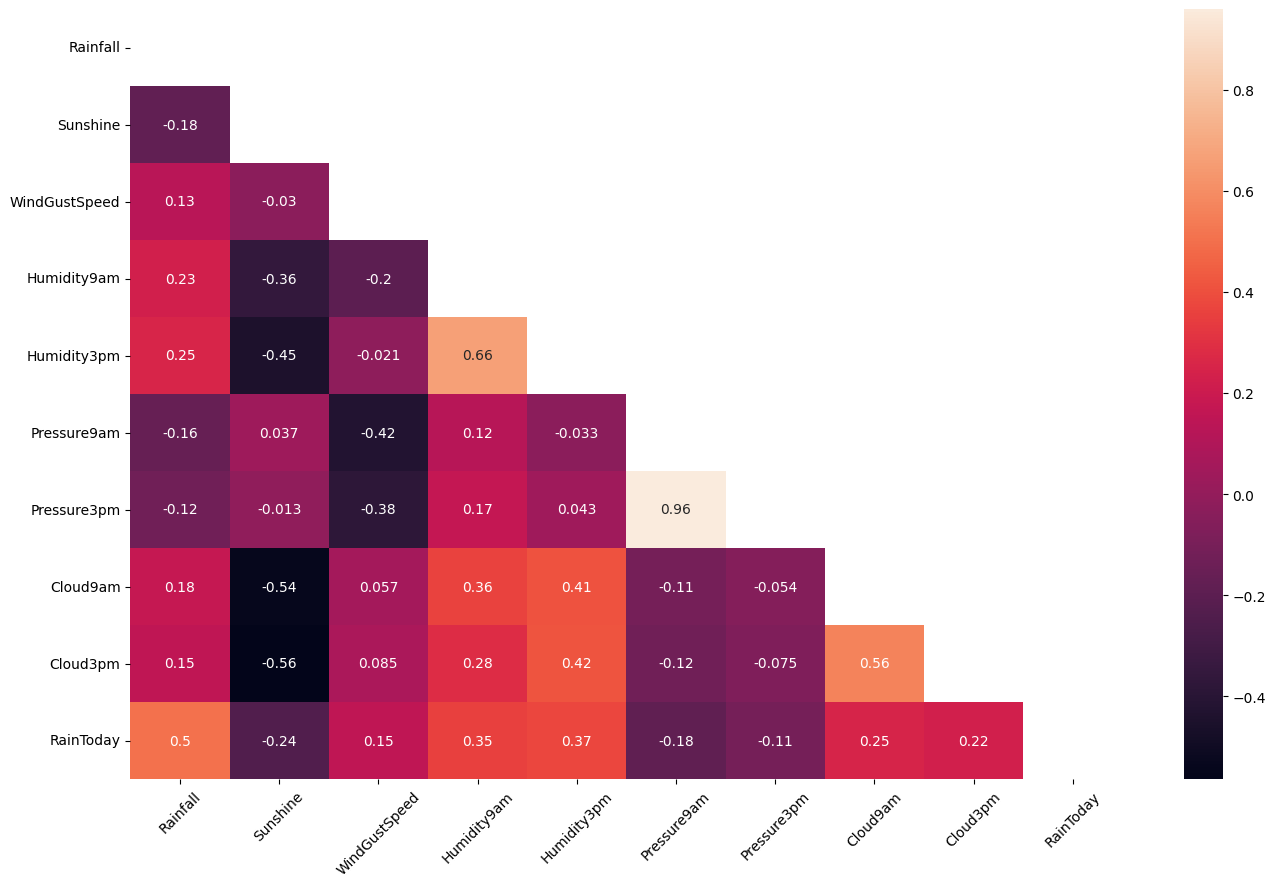

In [59]:
final_test_corr = final_weather_test_data.corr()
mask = np.triu(np.ones_like(final_test_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_test_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

## **5.3. Train-Test-Val Split**
The weather data has been divided into **X** and **y** sets based on the feature variables and the target variable. The **X** set contains all the independent variables whereas the **y** set contains the dependent variable `RainTomorrow`. The **X** and **y** sets have been divided into **80:20** ratio i.e. 80% of data can be used for training purpose and 20% of data can be used for testing purpose. The unknown data has been considered as the validation set which will be used for validating the trained classifiers.

In [61]:
X = final_weather_train_data.drop(['RainTomorrow'], axis=1)
y = final_weather_train_data['RainTomorrow']

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(79612, 10) (19904, 10) (79612,) (19904,)


In [63]:
X_test = final_weather_test_data
print(X_test.shape)

(42250, 10)


## **5.4. Classification Models**

### **5.4.1. Logistic Regression Model**

In [70]:
log_reg_model = LogisticRegression()
# Record the start time
start_time = time.time()

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_val)
# Record the end time
end_time = time.time()

# Calculate the time taken
lr_fit_time_taken = end_time - start_time


In [72]:
log_reg_model_score = log_reg_model.score(X_val, y_val)
log_reg_model_accuracy = round(log_reg_model_score*100, 2)
print("The classification accuracy of Logistic Regression model is "+ str(log_reg_model_accuracy)+"%")

The classification accuracy of Logistic Regression model is 84.05%


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

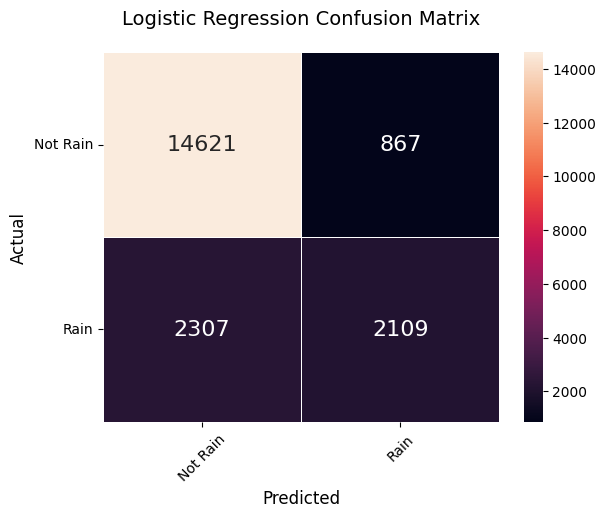

In [73]:
y_pred = log_reg_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

In [75]:

print('Logistic Regression Classification Report')
print('=========================================')
print()
print('The accuracy is:\n\n ',classification_report(y_val, y_pred, target_names=class_labels))
print()
coh_kap_lr = cohen_kappa_score(y_val, y_pred)
print("Cohen's Kappa = {}".format(coh_kap_lr))
print()
roc_auc_lr = roc_auc_score(y_val, y_pred) 
print("ROC Area under Curve = {}".format(roc_auc_lr))
print()

print(f"Time taken: {lr_fit_time_taken} seconds")


Logistic Regression Classification Report

The accuracy is:

                precision    recall  f1-score   support

    Not Rain       0.86      0.94      0.90     15488
        Rain       0.71      0.48      0.57      4416

    accuracy                           0.84     19904
   macro avg       0.79      0.71      0.74     19904
weighted avg       0.83      0.84      0.83     19904


Cohen's Kappa = 0.4772262189231786

ROC Area under Curve = 0.7108013497125404

Time taken: 1.7428607940673828 seconds


### **5.4.2. KNN Classification Model**

In [76]:
knn_model = KNeighborsClassifier()
# Record the start time
start_time = time.time()

# Fit the model to the training data
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_val)

# Record the end time
end_time = time.time()

# Calculate the time taken
knn_time_taken = end_time - start_time

In [77]:
knn_model.predict(X_val)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [78]:
knn_model_score = knn_model.score(X_val, y_val)
knn_model_accuracy = round(knn_model_score*100, 2)
print("The classification accuracy of KNN model is "+ str(knn_model_accuracy)+"%")

The classification accuracy of KNN model is 82.98%


Text(0.5, 1.0, 'KNN Confusion Matrix')

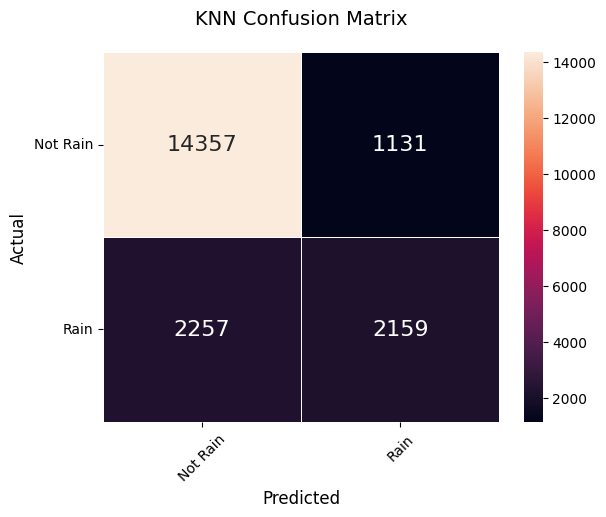

In [79]:
y_pred = knn_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('KNN Confusion Matrix', fontsize=14, pad=20)

In [80]:
print('KNN Classification Report')
print('=========================================')
print()
print('The validation accuracy is:\n\n ',classification_report(y_val, y_pred, target_names=class_labels))
coh_kap_knn = cohen_kappa_score(y_val, y_pred)
print("Cohen's Kappa = {}".format(coh_kap_knn))
print()
roc_auc_knn = roc_auc_score(y_val, y_pred) 
print("ROC Area under Curve = {}".format(roc_auc_knn))
print()
print(f"Time taken: {knn_time_taken} seconds")


KNN Classification Report

The validation accuracy is:

                precision    recall  f1-score   support

    Not Rain       0.86      0.93      0.89     15488
        Rain       0.66      0.49      0.56      4416

    accuracy                           0.83     19904
   macro avg       0.76      0.71      0.73     19904
weighted avg       0.82      0.83      0.82     19904

Cohen's Kappa = 0.45758401602844934

ROC Area under Curve = 0.7079398543238711

Time taken: 5.315263509750366 seconds


### **5.4.3. Decision Tree Classification Model**

In [81]:

dtree_model = DecisionTreeClassifier()

# Record the start time
start_time = time.time()

dtree_model.fit(X_train, y_train)
y_pred = dtree_model.predict(X_val)

# Record the end time
end_time = time.time()

# Calculate the time taken
dtree_time_taken = end_time - start_time

In [82]:
dtree_model.predict(X_val)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [83]:
dtree_model_score = dtree_model.score(X_val, y_val)
dtree_model_accuracy = round(dtree_model_score*100, 2)
print("The classification accuracy of Decision Tree model is "+ str(dtree_model_accuracy)+"%")

The classification accuracy of Decision Tree model is 77.68%


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

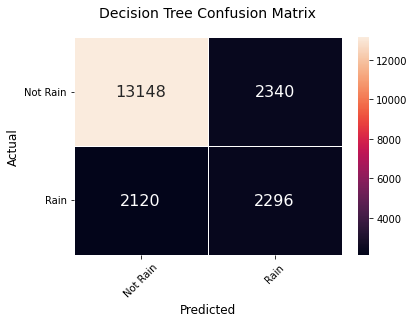

In [68]:
y_pred = dtree_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Decision Tree Confusion Matrix', fontsize=14, pad=20)

In [84]:
print('Decision Tree Classification Report')
print('=========================================')
print('The validation accuracy is:\n\n ',classification_report(y_val, y_pred, target_names=class_labels))
coh_kap_dtree = cohen_kappa_score(y_val, y_pred)
print("Cohen's Kappa = {}".format(coh_kap_dtree))
print()
roc_auc_dtree = roc_auc_score(y_val, y_pred) 
print("ROC Area under Curve = {}".format(roc_auc_dtree))
print()
print(f"Time taken: {dtree_time_taken} seconds")

Decision Tree Classification Report
The validation accuracy is:

                precision    recall  f1-score   support

    Not Rain       0.86      0.85      0.86     15488
        Rain       0.50      0.52      0.51      4416

    accuracy                           0.78     19904
   macro avg       0.68      0.68      0.68     19904
weighted avg       0.78      0.78      0.78     19904

Cohen's Kappa = 0.3622333990743941

ROC Area under Curve = 0.6835942178704036

Time taken: 1.7770750522613525 seconds


### **5.4.4 Random Forest Classification Model**

In [85]:
rforest_model = RandomForestClassifier()

# Record the start time
start_time = time.time()
rforest_model.fit(X_train, y_train)
y_pred = rforest_model.predict(X_val)
# Record the end time
end_time = time.time()

# Calculate the time taken
rforest_time_taken = end_time - start_time

In [86]:
rforest_model.predict(X_val)

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [87]:
rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The classification accuracy of Random Forest model is 84.76%


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

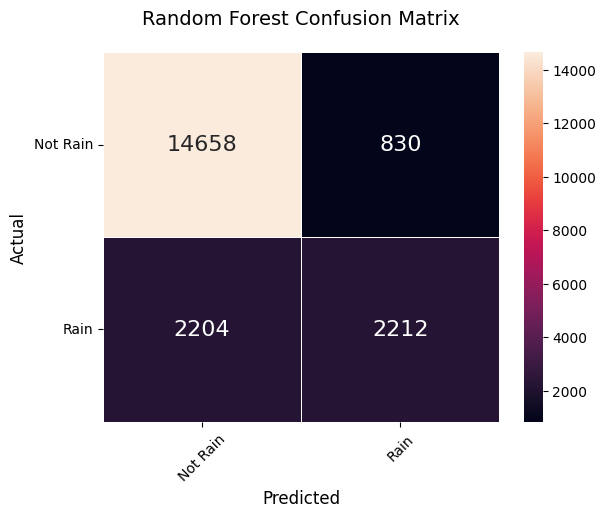

In [88]:
y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [89]:
print('Random Forest Classification Report')
print('=========================================')
print()
print('The validation accuracy is:\n\n ',classification_report(y_val, y_pred, target_names=class_labels))
coh_kap_rforest = cohen_kappa_score(y_val, y_pred)
print("Cohen's Kappa = {}".format(coh_kap_rforest))
print()
roc_auc_rforest = roc_auc_score(y_val, y_pred) 
print("ROC Area under Curve = {}".format(roc_auc_rforest))
print()
print(f"Time taken: {rforest_time_taken} seconds")


Random Forest Classification Report

The validation accuracy is:

                precision    recall  f1-score   support

    Not Rain       0.87      0.95      0.91     15488
        Rain       0.73      0.50      0.59      4416

    accuracy                           0.85     19904
   macro avg       0.80      0.72      0.75     19904
weighted avg       0.84      0.85      0.84     19904

Cohen's Kappa = 0.5032885143621798

ROC Area under Curve = 0.7236579605341957

Time taken: 38.82400870323181 seconds


## **5.5 Classification Model Performance Analysis**

In [90]:
accuracy_dict = {'Logistic Regrssion' : log_reg_model_accuracy,
                 'K-Nearest Neighbors' : knn_model_accuracy,
                 'Decision Tree' : dtree_model_accuracy,
                 'Random Forest' : rforest_model_accuracy,
}
print("Classification Accuracy of All Models")
print('=====================================')
print()
for k, v in accuracy_dict.items():
    print(k,"=",v,"%")

Classification Accuracy of All Models

Logistic Regrssion = 84.05 %
K-Nearest Neighbors = 82.98 %
Decision Tree = 77.68 %
Random Forest = 84.76 %


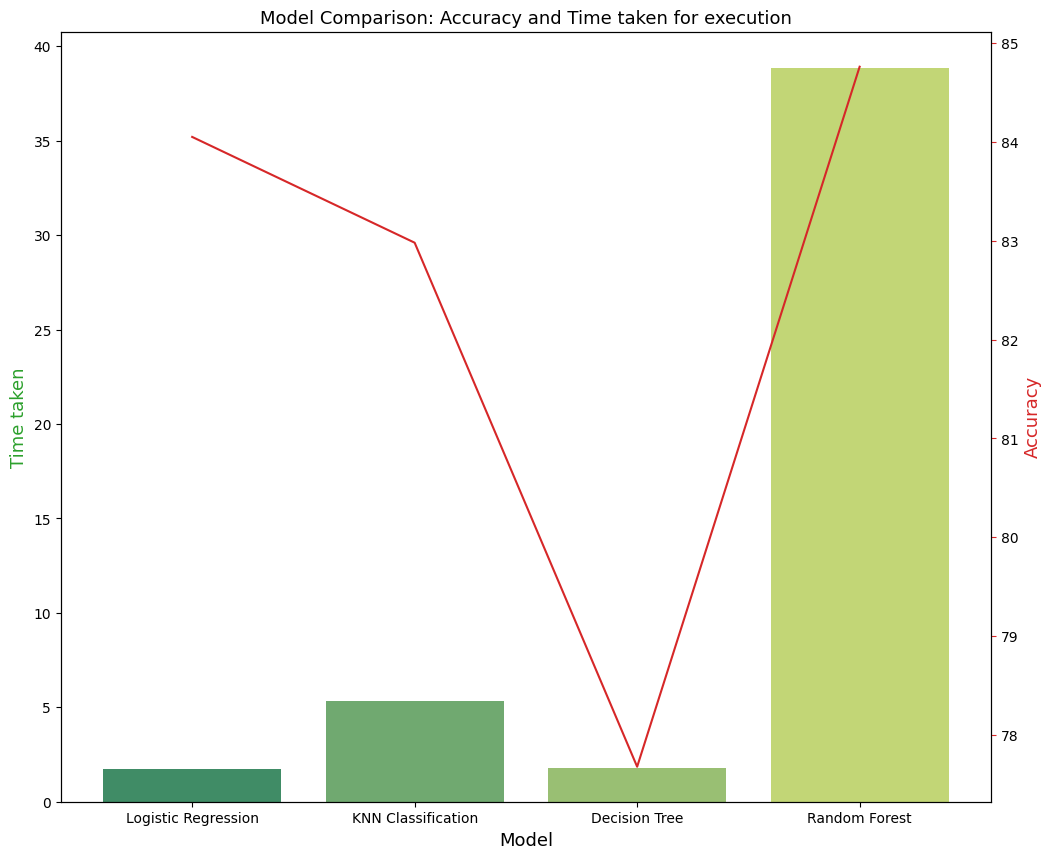

In [91]:
accuracy_scores = [log_reg_model_accuracy, knn_model_accuracy, dtree_model_accuracy, rforest_model_accuracy]
tt = [lr_fit_time_taken, knn_time_taken, dtree_time_taken, rforest_time_taken]
roc_auc_scores = [roc_auc_lr, roc_auc_knn,roc_auc_dtree,  roc_auc_rforest]
coh_kap_scores = [coh_kap_lr, coh_kap_knn, coh_kap_dtree, coh_kap_rforest]
model_data = {'Model': ['Logistic Regression','KNN Classification','Decision Tree','Random Forest'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

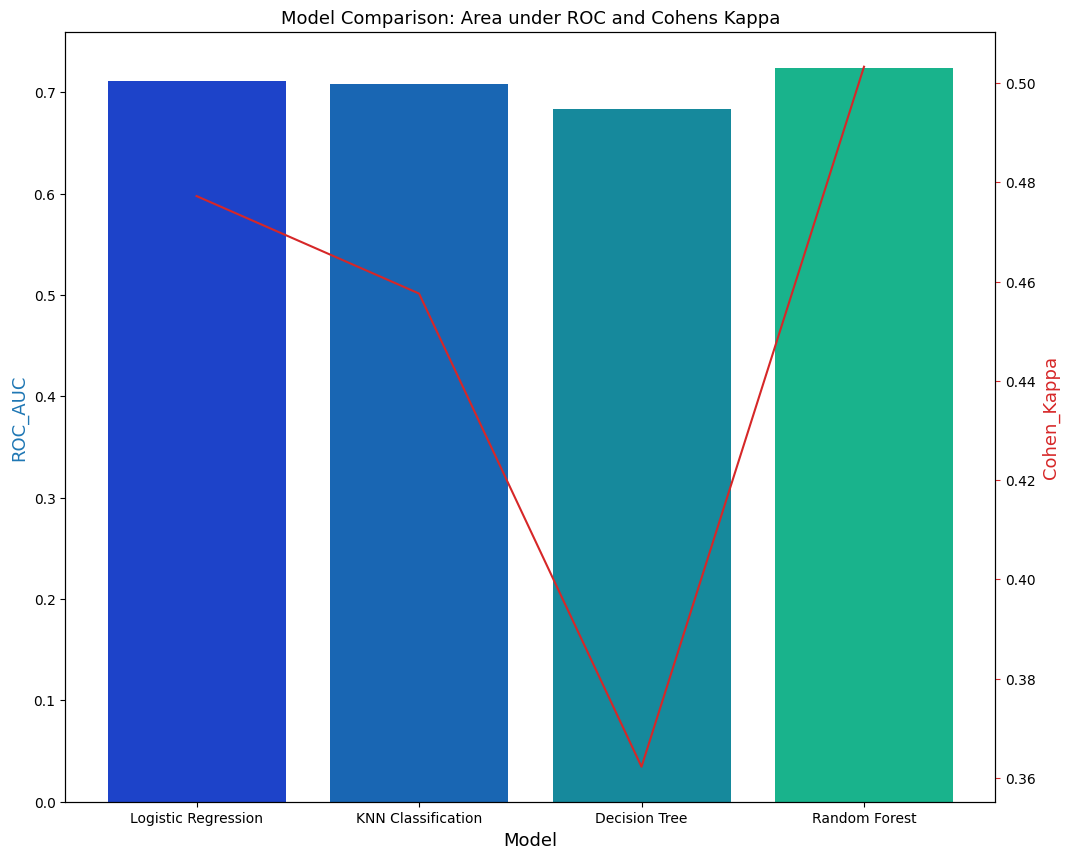

In [92]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

## **5.6 Improving Random Forest Classifier**

### **5.6.1. Hyperparameter Optimization of Random Forest Classifier**

In [84]:
n_estimators = [100, 150, 200]
max_depth = [10, 15, 20]
criterion = ['gini', 'entropy']
bootstrap = [True,False]
random_state = [10, 20]
max_features = ['auto', 'sqrt']
min_samples_split = [1, 2, 3]
min_samples_leaf = [1, 2, 3]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              criterion = criterion, bootstrap = bootstrap,
              random_state = random_state, max_features = max_features, 
              min_samples_split = min_samples_split,
              min_samples_leaf = min_samples_leaf)

randF = GridSearchCV(rforest_model, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = randF.fit(X_train, y_train)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


In [85]:
print("Results from Random Search ::" )
print("\nThe best estimator across ALL searched params:\n", randF.best_estimator_)
print("\nThe best parameters across ALL searched params:\n", randF.best_params_)

Results from Random Search ::

The best estimator across ALL searched params:
 RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       n_estimators=200, random_state=10)

The best parameters across ALL searched params:
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 10}


### **5.6.2. Random Forest Classifier with Optimized Hyperparameters**

In [86]:
rforest_model = RandomForestClassifier(**randF.best_params_)
rforest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       n_estimators=200, random_state=10)

In [87]:
rforest_model.predict(X_val)

array([0, 1, 0, ..., 0, 0, 1])

In [88]:
rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The classification accuracy of Random Forest model is 84.95%


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

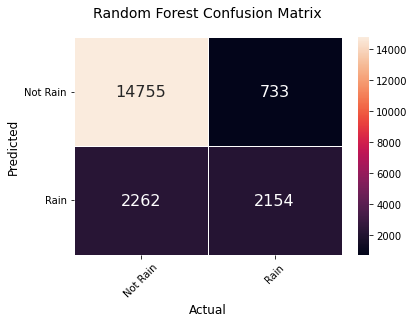

In [89]:
y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [90]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.95      0.91     15488
        Rain       0.75      0.49      0.59      4416

    accuracy                           0.85     19904
   macro avg       0.81      0.72      0.75     19904
weighted avg       0.84      0.85      0.84     19904



## **5.6 Final Prediction on Unknown Weather Data**

In [91]:
predicted_value = rforest_model.predict(X_test)

In [92]:
final_prediction_df = pd.DataFrame()
final_prediction_df = updated_unknown_weather_df
final_prediction_df["Predict-RainTomorrow"] = predicted_value
final_prediction_df.to_csv("Final Rain Prediction.csv", index=False)
final_prediction_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Predict-RainTomorrow
0,Albury,12.9,25.7,0.0,5.489715,7.647831,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,0,0
1,Albury,9.2,28.0,0.0,5.489715,7.647831,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,0,0
2,Albury,14.3,25.0,0.0,5.489715,7.647831,W,50.0,SW,W,...,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,0,0
3,Albury,9.7,31.9,0.0,5.489715,7.647831,NNW,80.0,SE,NW,...,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,0,0
4,Albury,15.9,18.6,15.6,5.489715,7.647831,W,61.0,NNW,NNW,...,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1,1


## **6. Export models**

In [ ]:
import pickle

with open("rforest_model.pkl", "wb") as f:
    pickle.dump(rforest_model, f)
